# Feature Selection 


- This tutorial illustrates how to perform selection using two methods. 
- Recursive feature elimination (RFE)
- Sequential feature selection (SFS)

In [1]:
import pandas as pd
import numpy as np

# Read data

Wine data: original source is https://archive.ics.uci.edu/ml/machine-learning-databases/wine/

Class label is the first column. Three classes : `1, 2, 3`

In [2]:
df_wine = pd.read_csv('wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# Train test split

In [4]:
from sklearn.model_selection import train_test_split
df_wine_features = df_wine.loc[:,'Alcohol':'Proline']
df_wine_class = df_wine.loc[:,'Class label']
X_train, X_test, y_train, y_test =train_test_split(df_wine_features, df_wine_class,test_size=0.2)

#display(X_train,X_test)

print("Shapes of training and testing data")
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

Shapes of training and testing data
(142, 13) (36, 13) (142,) (36,)


# Automatic recursive feature elimination using `RFECV`


RFECV is Recursive feature elimination with cross-validation to select features.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html

    It works best with a supervised model that provides information about feature importance either through `coef_` attribute or `feature_importance_` attribute.
    
Example models that can be used:

- Random Forest
- Logistic Regression
- Decision Trees
- Boosted Trees


In [5]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

'''
Logistic regression 
Random Forest 

This version of recursive feature elimination requires the user to provide specific values for the model parameters.

Recursive Feature Elimination simply estimates the best set of features for that specific values of the model parameters.
'''

lr = LogisticRegression(penalty='none',solver='saga',max_iter = 10000)
rf = RandomForestClassifier(max_features='sqrt',n_estimators=200)


#### Run Recursive Feature Elimination for logistic regression

- `step` corresponds to the (integer) number of features to be removed at each iteration
- `min_features_to_select` is the min no. of features to be selected
- `importance_getter` uses the feature importance either through a `coef_` or `feature_importances_` attributes of estimator.
Also accepts a string that specifies an attribute name/path for extracting feature importance. 

In [9]:
rfe_lr = RFECV(estimator=lr,cv=5,importance_getter='auto',scoring='accuracy',step=1,min_features_to_select=1,verbose=0)
rfe_lr.fit(X_train_std,y_train)

RFECV(cv=5,
      estimator=LogisticRegression(max_iter=10000, penalty='none',
                                   solver='saga'),
      scoring='accuracy')

In [10]:
print("Optimal number of features : ", rfe_lr.n_features_)
print("optimal features selected ",rfe_lr.ranking_)

Optimal number of features :  7
optimal features selected  [1 4 1 2 7 3 1 5 6 1 1 1 1]


The feature ranking, such that `ranking_[i]` corresponds to the ranking position of the `i-th` feature. Selected (i.e., estimated best) features are assigned rank 1.

In [11]:
print(rfe_lr.grid_scores_.shape)
print("\n=================================================")
print("accuracies on each k-fold \n", rfe_lr.grid_scores_)
cross_val_scores = rfe_lr.grid_scores_.mean(axis=1)
print("\n=================================================")
print("averaged accuracies (over the folds) \n", cross_val_scores)


(13, 5)

accuracies on each k-fold 
 [[0.79310345 0.65517241 0.67857143 0.78571429 0.82142857]
 [0.93103448 0.82758621 0.78571429 0.82142857 0.96428571]
 [0.93103448 0.96551724 0.89285714 0.85714286 1.        ]
 [0.96551724 0.96551724 0.96428571 0.85714286 1.        ]
 [1.         0.96551724 0.96428571 1.         1.        ]
 [1.         1.         0.96428571 1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         0.96428571 1.        ]
 [1.         1.         1.         0.96428571 1.        ]
 [0.96551724 1.         1.         0.96428571 1.        ]
 [0.96551724 1.         1.         0.96428571 1.        ]]

averaged accuracies (over the folds) 
 [0.74679803 0.86600985 0.92931034 0.95049261 0.98596059 0.99285714
 1.         1.         1.         0.99285714 0.99285714 0.98596059
 0.98596059]


C:\Users\soibamb\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


`grid_scores_` contains the accuracy scores on each fold of the cross-validation sets. The last row of the matrix indicates the accuracy scores when all the features are used ( in this case 13) for each of the k-fold of the cross-validations sets.
In our case `grid_scores_` has 13 rows because `min_features_to_select` is set to 1.

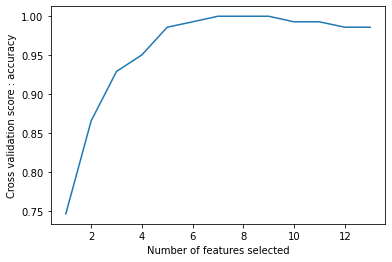

In [12]:
import matplotlib.pyplot as plt
plt.plot(range(1, 14), cross_val_scores)
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score : accuracy")
plt.show()

#### Run Recursive Feature Elimination for Random Forest


Optimal number of features :  9
optimal features selected  [1 1 3 4 1 1 1 5 2 1 1 1 1]
(13, 5)

accuracies on each k-fold 
 [[0.65517241 0.72413793 0.71428571 0.64285714 0.67857143]
 [0.89655172 0.86206897 0.75       0.85714286 0.92857143]
 [0.93103448 0.96551724 0.78571429 0.89285714 0.96428571]
 [0.96551724 0.96551724 0.85714286 0.92857143 1.        ]
 [1.         0.96551724 0.96428571 0.92857143 1.        ]
 [1.         0.96551724 0.96428571 0.96428571 1.        ]
 [1.         0.96551724 0.96428571 0.96428571 1.        ]
 [1.         0.96551724 0.96428571 1.         1.        ]
 [1.         0.96551724 1.         1.         1.        ]
 [1.         0.96551724 0.96428571 0.96428571 1.        ]
 [1.         0.96551724 0.96428571 0.96428571 1.        ]
 [1.         0.96551724 0.92857143 1.         1.        ]
 [1.         1.         0.96428571 1.         1.        ]]

averaged accuracies (over the folds) 
 [0.68300493 0.858867   0.90788177 0.94334975 0.97167488 0.97881773
 0.97881773 0.

C:\Users\soibamb\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


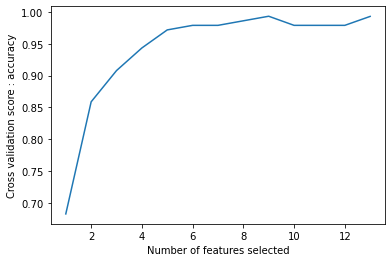

In [13]:
rfe_rf = RFECV(estimator=rf,cv=5,importance_getter='auto',scoring='accuracy',step=1,min_features_to_select=1,verbose=0)
rfe_rf.fit(X_train_std,y_train)


print("Optimal number of features : ", rfe_rf.n_features_)
print("optimal features selected ",rfe_rf.ranking_)


print(rfe_rf.grid_scores_.shape)
print("\n=================================================")
print("accuracies on each k-fold \n", rfe_rf.grid_scores_)
cross_val_scores = rfe_rf.grid_scores_.mean(axis=1)
print("\n=================================================")
print("averaged accuracies (over the folds) \n", cross_val_scores)


import matplotlib.pyplot as plt
plt.plot(range(1, 14), cross_val_scores)
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score : accuracy")
plt.show()

# Automatic Sequential feature selection (SFS) using `SequentialFeatureSelector` from `mlxtend` package

`mlxtend` can be found here http://rasbt.github.io/mlxtend/ and Feature Selection functions can be found here
    
http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/
    
    To install, simply type `pip install mlxtend` in the anaconda command prompt
    
- `k_features` is the largest number of features desired. When `k_features = 3`, the algorithm will select the best 3 features.
- `forward = True` means forward sequential feature selection.


In [14]:
from mlxtend.feature_selection import SequentialFeatureSelector
feature_names = X_train.columns.tolist()
print('feature names are :', feature_names)

sfs_lr = SequentialFeatureSelector(lr, scoring = 'accuracy',cv=5,forward=True,k_features=13,verbose=2)
sfs_lr.fit(X_train_std,y_train,custom_feature_names=feature_names)

feature names are : ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished

[2022-09-12 16:08:53] Features: 1/13 -- score: 0.8243842364532019[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.4s finished

[2022-09-12 16:08:54] Features: 2/13 -- score: 0.9364532019704435[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    1.3s finished

[2022-09-12 16:08:55] Features: 3/13 -- score: 0.9507389162561577[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

SequentialFeatureSelector(estimator=LogisticRegression(max_iter=10000,
                                                       penalty='none',
                                                       solver='saga'),
                          k_features=13, scoring='accuracy', verbose=2)

Via the `subsets_` attribute, we can view the indices of selected features at each step (iteration)

In [15]:
sfs_lr.subsets_

{1: {'feature_idx': (6,),
  'cv_scores': array([0.79310345, 0.79310345, 0.85714286, 0.78571429, 0.89285714]),
  'avg_score': 0.8243842364532019,
  'feature_names': ('Flavanoids',)},
 2: {'feature_idx': (0, 6),
  'cv_scores': array([0.89655172, 1.        , 0.89285714, 0.92857143, 0.96428571]),
  'avg_score': 0.9364532019704435,
  'feature_names': ('Alcohol', 'Flavanoids')},
 3: {'feature_idx': (0, 2, 6),
  'cv_scores': array([0.96551724, 0.93103448, 0.92857143, 0.96428571, 0.96428571]),
  'avg_score': 0.9507389162561577,
  'feature_names': ('Alcohol', 'Ash', 'Flavanoids')},
 4: {'feature_idx': (0, 2, 6, 7),
  'cv_scores': array([0.96551724, 0.96551724, 0.92857143, 0.96428571, 0.96428571]),
  'avg_score': 0.9576354679802955,
  'feature_names': ('Alcohol', 'Ash', 'Flavanoids', 'Nonflavanoid phenols')},
 5: {'feature_idx': (0, 2, 6, 7, 9),
  'cv_scores': array([0.96551724, 1.        , 0.96428571, 0.96428571, 1.        ]),
  'avg_score': 0.9788177339901478,
  'feature_names': ('Alcohol',
  

We can also visualize the output using Pandas DataFrame using the `get_metric_dict` method of `SequentialFeatureSelector`  object. The columns `std_dev` and `std_err` represent the standard deviation and standard errors of the cross-validation scores, respectively.

In [16]:
pd.DataFrame.from_dict(sfs_lr.get_metric_dict(confidence_interval=0.90)).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(6,)","[0.7931034482758621, 0.7931034482758621, 0.857...",0.824384,"(Flavanoids,)",0.043251,0.042928,0.021464
2,"(0, 6)","[0.896551724137931, 1.0, 0.8928571428571429, 0...",0.936453,"(Alcohol, Flavanoids)",0.041217,0.040909,0.020454
3,"(0, 2, 6)","[0.9655172413793104, 0.9310344827586207, 0.928...",0.950739,"(Alcohol, Ash, Flavanoids)",0.017247,0.017118,0.008559
4,"(0, 2, 6, 7)","[0.9655172413793104, 0.9655172413793104, 0.928...",0.957635,"(Alcohol, Ash, Flavanoids, Nonflavanoid phenols)",0.014652,0.014542,0.007271
5,"(0, 2, 6, 7, 9)","[0.9655172413793104, 1.0, 0.9642857142857143, ...",0.978818,"(Alcohol, Ash, Flavanoids, Nonflavanoid phenol...",0.017431,0.017301,0.008651
6,"(0, 2, 6, 7, 9, 10)","[1.0, 1.0, 0.9642857142857143, 1.0, 1.0]",0.992857,"(Alcohol, Ash, Flavanoids, Nonflavanoid phenol...",0.014393,0.014286,0.007143
7,"(0, 2, 6, 7, 9, 10, 11)","[1.0, 1.0, 1.0, 1.0, 1.0]",1.0,"(Alcohol, Ash, Flavanoids, Nonflavanoid phenol...",0.0,0.0,0.0
8,"(0, 2, 3, 6, 7, 9, 10, 11)","[1.0, 1.0, 1.0, 1.0, 1.0]",1.0,"(Alcohol, Ash, Alcalinity of ash, Flavanoids, ...",0.0,0.0,0.0
9,"(0, 2, 3, 6, 7, 8, 9, 10, 11)","[1.0, 1.0, 1.0, 1.0, 1.0]",1.0,"(Alcohol, Ash, Alcalinity of ash, Flavanoids, ...",0.0,0.0,0.0
10,"(0, 2, 3, 6, 7, 8, 9, 10, 11, 12)","[1.0, 1.0, 1.0, 1.0, 1.0]",1.0,"(Alcohol, Ash, Alcalinity of ash, Flavanoids, ...",0.0,0.0,0.0


After importing the little helper function `plotting.plot_sequential_feature_selection`, we can also visualize the results.

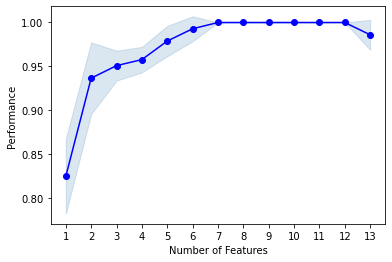

In [17]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1=plot_sfs(sfs_lr.get_metric_dict(),kind='std_dev')

## Exercise

From the above analysis, it looks like `forward sequential feature selection` reaches highest accuracy when number of features = 7. USe those 7 features and tune logistic regression model. Report accuracies on the training and testing sets.